**FDI In Nepal**
> Along with the process of liberalization in the mid-1980s, Nepal put efforts to attract FDI to fill the resources gap in private capital formation. Foreign Investment and Technology Transfer Act, 1982 was enacted to attract and utilize the foreign investment in Nepal. Subsequently, a new Foreign Investment and Technology Transfer Act, 1992 was enacted to facilitate the liberalization process of 1990s. Thereafter, Nepal became member of the World Trade Organization-WTO, Bay of Bengal Initiative for Multi-Sectoral Technical and Economic Cooperation-BIMSTEC, South Asia Free Trade Agreement-SAFTA and Multilateral Investment Guarantee Agency-MIGA. Nepal signed Bilateral Investment Protection and Promotion Agreement (BIPPA) with six countries and Double Taxation Avoidance Agreement with ten countries. Nepal has obtained access to neighboring and global markets. Investment Board Act, 2010 was enacted based on which Investment Board has been established.

> **Main Agenda** 
1.   Investigate Countries and their Investment.
2.   Investigate ForeignInvestment and Category.
3.   Top 10 countries with highest amount of investment in Nepal.
4.   Investigate investment in particular Category in particular date.
5.   ForeignInvestment approved in each year.



**Import Libraries**
> We will start by importing the Python libraries we will be using in this analysis. These libraries include:
*   **pandas** and **numpy** for data ingestion and manipulation.
*   **matplotlib** and **seaborn** for data visualization



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ingest Data**
> Now, we will need to read the dataset which is stored on  Google Drive.



In [ ]:
Data = "/content/drive/MyDrive/Dataset/FDI Data.csv"

**df is a variable pointing to a pandas data frame**

In [ ]:
df = pd.read_csv(Data)

**Exploring Data**
> We will start our data exploration by generating simple statistics of the data.
* Let us look at what the data columns are using










In [ ]:
df.columns

Index(['Country', 'Category', 'ForeignInvestment', 'Date', 'FinancialYear'], dtype='object')

The dataset have 3764 row and 5 column

* **Next will display simple statistics of our dataset.**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ForeignInvestment,3764.0,133.476639,1212.090239,0.0,5.0,12.0,35.0,39950.5
Date,3764.0,2014.563762,3.705893,2005.0,2012.0,2015.0,2018.0,2020.0


**Data Cleaning: Handling Missing Data**
> Real data is never clean. We need to make sure we clean the data by converting or getting rid of null or missing values.

In [ ]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (3764, 5))

Now let's try to find how many data points in each column are null.

In [ ]:
df.isnull().sum(axis=0)

Country               0
Category             25
ForeignInvestment     0
Date                  0
FinancialYear         0
dtype: int64

**Fixing Null Values by Deleting Them**

In [ ]:
# Fix it
# Take initial of rows
rows = df.shape[0]
# Drop the NULL rows
df = df.dropna()

Now if we check the null values and number of rows, we will see that there are no null values and number of rows decreased accordingly.

In [ ]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

3764


(False, (3739, 5))

To find exactly how many lines we removed, we need to subtract the current number of rows in our data frame from the original number of rows.

In [ ]:
#How many rows with NULL values?
rows - df.shape[0]

25

Instead of looking at same top 10 lines every time, we shuffle - so we get to see different random sample on top. This way, we make sure the data is not in any particular order when we try sampling from it (like taking top or bottom few rows) by randomly shuffling the rows.

In [ ]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows
df = df.reindex(np.random.permutation(df.index))

In [ ]:
df

,Country,Category,ForeignInvestment,Date,FinancialYear
962,Australia,Service,5.00,2012,2011-2012
110,UK,Tourism,5.25,2006,2005-2006
2094,Spain,Manufacturing,18.00,2016,2015-2016
2174,S. Korea,Service,20.00,2016,2015-2016
1941,Ukraine,Tourism,25.00,2015,2014-2015
...,...,...,...,...,...
1805,S. Africa,Service,5.00,2015,2014-2015
3243,China,Manufacturing,10.00,2019,2018-2019
3002,China,Tourism,15.00,2018,2017-2018
2991,China,Tourism,20.00,2018,2017-2018


Converting the **Date** column to **object**

In [ ]:
df['Date'] = df['Date'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3739 entries, 962 to 2970
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            3739 non-null   object 
 1   Category           3739 non-null   object 
 2   ForeignInvestment  3739 non-null   float64
 3   Date               3739 non-null   object 
 4   FinancialYear      3739 non-null   object 
dtypes: float64(1), object(4)
memory usage: 175.3+ KB


Check **unique** value in the dataset

In [ ]:
df.nunique()

Country               86
Category               8
ForeignInvestment    493
Date                  15
FinancialYear         15
dtype: int64

**We can Generate descriptive statistic like**
* Standard Deviation
* Minimum value
* Mean
* Maximum value etc.
> By using **.describe()** function



In [ ]:
df.ForeignInvestment.describe()

count     3739.000000
mean       133.713276
std       1215.824223
min          0.000000
25%          5.000000
50%         12.000000
75%         35.000000
max      39950.500000
Name: ForeignInvestment, dtype: float64

**Visualization** : Matplotlib
> **Fig 1:** Bar Plot between the Countries and their Investment. 
* **India** and **China** top the list with high margin than any other countries.

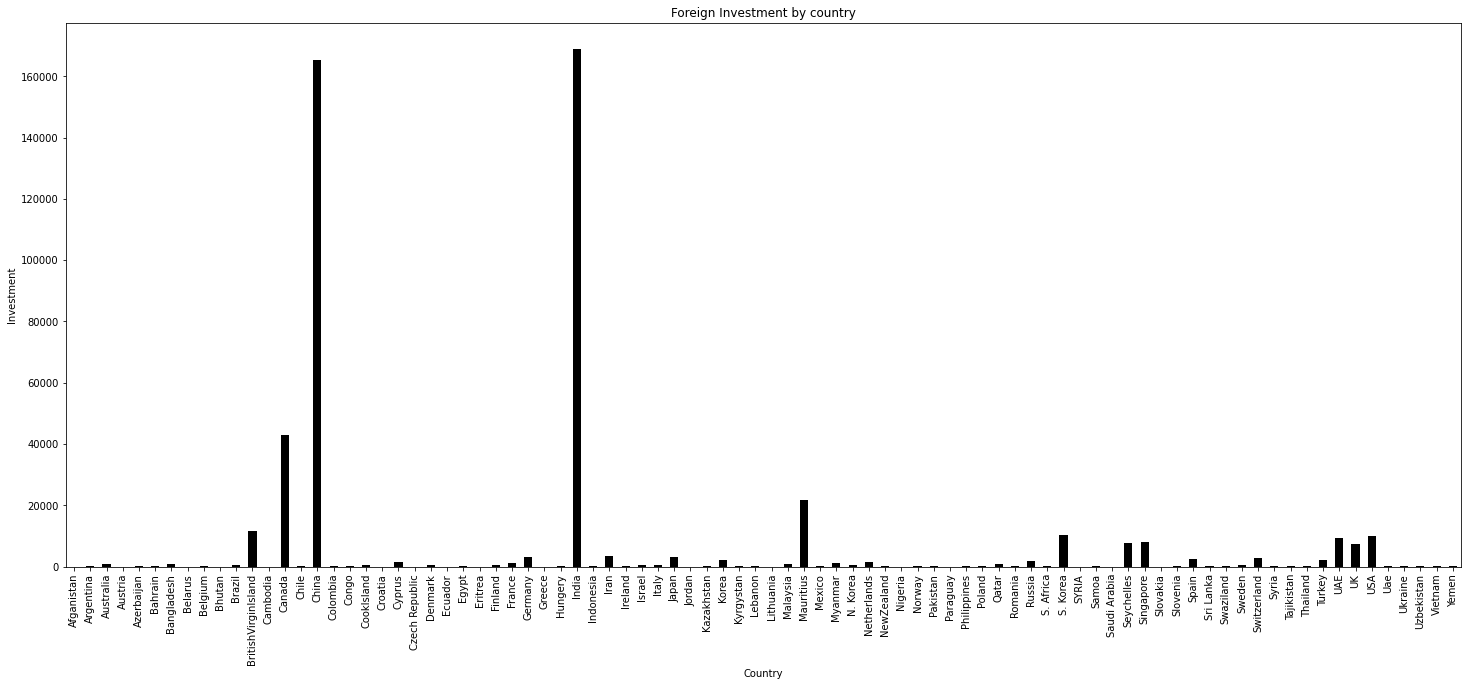

In [ ]:
df1 = df.groupby(['Country'])['ForeignInvestment'].sum()
df1.plot(kind='bar', title='Foreign Investment by country', ylabel='Investment',color="black",
         xlabel='Country', figsize=(25, 10))
plt.show()

**Fig 2:** Bar Plot between **ForeignInvestment** and **Category**
* Most of the investment are for **Energy** sector followed by **Manufacturing**.



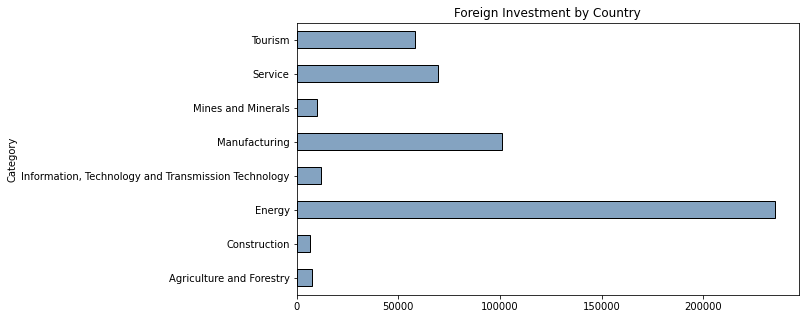

In [ ]:
df2 = df.groupby(['Category'])['ForeignInvestment'].sum()
df2.plot(kind='barh', title='Foreign Investment by Country', ylabel='Investment', color=(0.2, 0.4, 0.6, 0.6),edgecolor='black',
         xlabel='Category', figsize=(9, 5))
plt.show()

In [ ]:
#Sum of ForeignInvestment for each category. 
df2

Category
Agriculture and Forestry                                 7517.825400
Construction                                             6679.430000
Energy                                                 235241.290000
Information, Technology and Transmission Technology     11968.371800
Manufacturing                                          100878.571913
Mines and Minerals                                      10027.400000
Service                                                 69427.600480
Tourism                                                 58213.450680
Name: ForeignInvestment, dtype: float64

**Fig 3:** **Pie Cart** Showing **ForeignInvestment** as **Category**

1.   List item
2.   List item



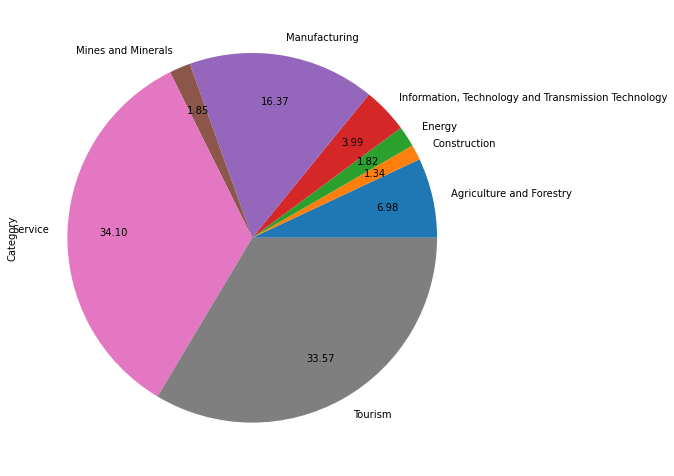

In [ ]:
df.groupby('Category')['Category'].count().plot.pie(autopct='%.2f',figsize=(8.5,8.5),pctdistance=0.75)
plt.show()

In [ ]:
#df3 is new dataframe consist of Category and Date
df3 = df[["Category", "Date"]]
df3

,Category,Date
962,Service,2012
110,Tourism,2006
2094,Manufacturing,2016
2174,Service,2016
1941,Tourism,2015
...,...,...
1805,Service,2015
3243,Manufacturing,2019
3002,Tourism,2018
2991,Tourism,2018


**Fig 4:** Line Plot Showing **ForeignInvestment** vs **Category**
> Foreign Investmen has increased in recent years then preveious year.

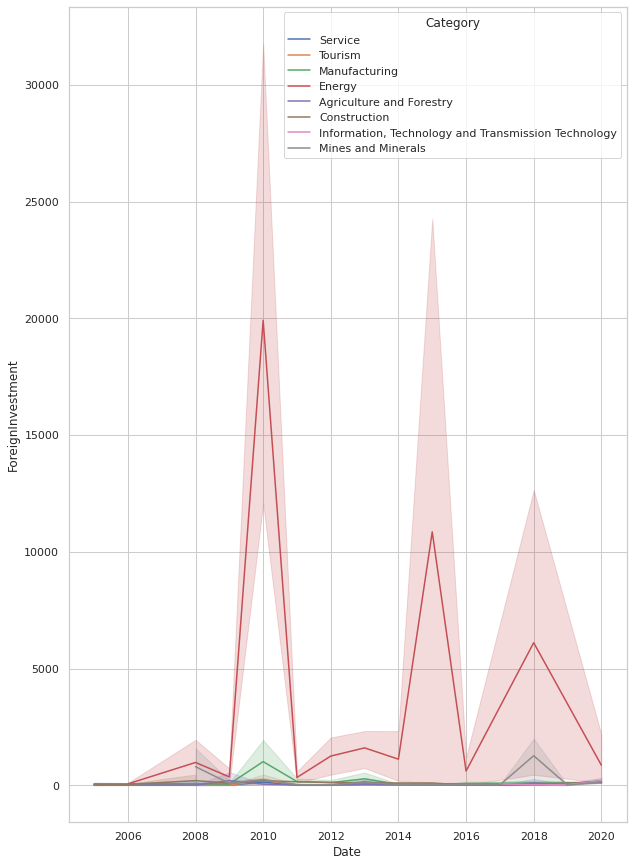

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10,15))
sns.lineplot(x="Date", y="ForeignInvestment", hue="Category", data=df)
plt.show()

In [ ]:
#Let's check total amount invested by individual Country  
dff = df.groupby(["Country"]).ForeignInvestment.sum().reset_index()
dff = dff.reindex(np.random.permutation(dff.index))
dff.head(3)

,Country,ForeignInvestment
33,Iran,3458.02
68,Slovenia,30.00
41,Kyrgystan,36.00


**Top 10 countries with highest amount of investment in Nepal**

In [ ]:
df4 = dff.nlargest(10, 'ForeignInvestment')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 31 to 65
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            10 non-null     object 
 1   ForeignInvestment  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes



**Fig 5**: **Bar Chart** Showing top 10 countries with highest amount of investment

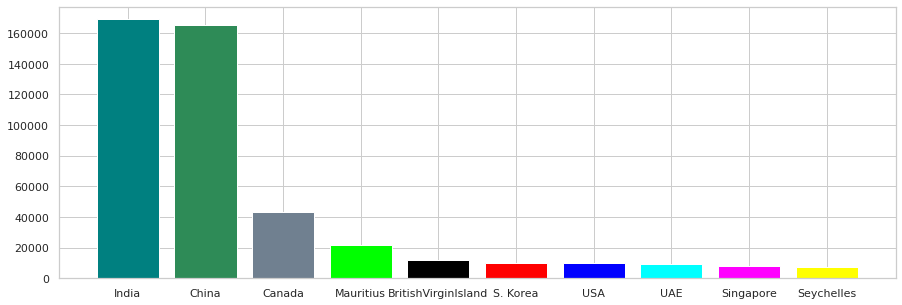

In [ ]:
import matplotlib.colors as mcolors
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df4['Country'], df4['ForeignInvestment'], width = 0.8, color=['teal','seagreen','slategray','lime','black', 
                                            'red', 'blue', 'cyan','magenta','yellow'])
plt.show()

**Fig 6:** **Top 10 countries** with highest amount of investment in **Pie chart**

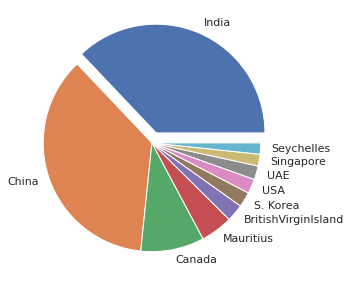

In [ ]:
y = df4['ForeignInvestment']
mylabels = df4['Country']
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

**Fig 7:** **Seaborn Boxplot** 

> Relation between investment in particular Category in particular date



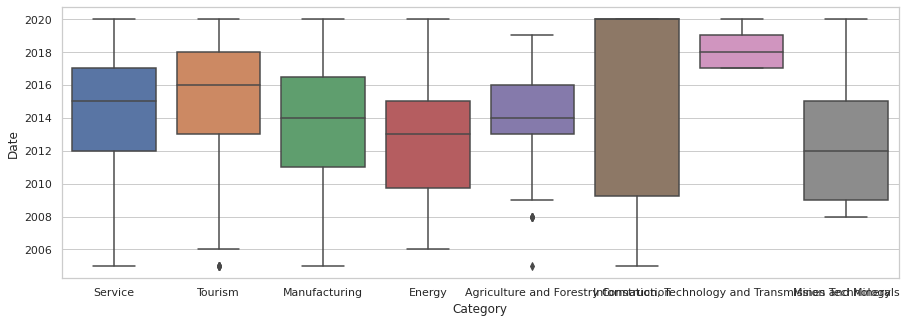

In [ ]:
sns.boxplot(x='Category',y='Date',data=df)
plt.show()

**ForeignInvestment approved in each year.**

In [ ]:
df5 = df.groupby(["Date"]).ForeignInvestment.sum().reset_index()
df5.head(3).append(df5.tail(3))

,Date,ForeignInvestment
0,2005,1112.730000
1,2006,2895.700000
2,2008,16057.600000
12,2018,55706.540000
13,2019,25257.348773
14,2020,37852.000000


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               15 non-null     int64  
 1   ForeignInvestment  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


**Fig 8:** **Seaborn Lineplot** 
> Amount of foreign investment approved every year

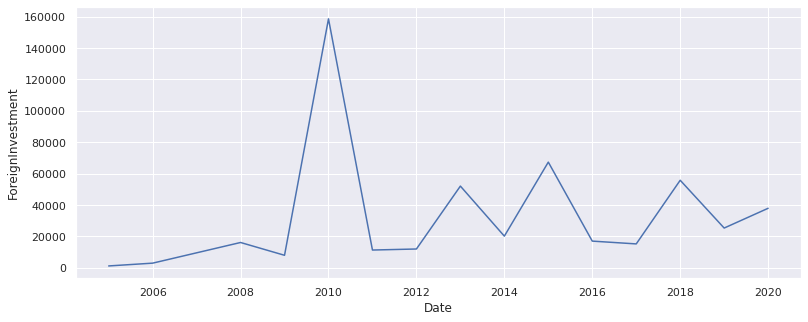

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df5, x="Date", y="ForeignInvestment")
plt.show()

**Conclusion**
> Comparing to other countries, two of the immediate neighbors, India and china are more interested in investing in Nepal. Foreign Investment in Nepal is very low in comparison to other countries. It shares only 0.01 percent of total FDI in the world while the South Asia received 3.1 percent of total FDI inflows in 2016. We can see rise in investment after certain acts but again the FDI decreases there after. This is because of the unstable government of Nepal. Acts and Policies changes according to different government which makes Foreign Investment hesitate to invest as their investment is not secure. Even if the investment is going in upward direction the increasing rate is quite low compared to other countries. The main reason is the instability of the government and poor infrastructure. Some of the major hindrances for the FDI inflow are:

1.   Restrictive FDI regime
2.   Lack of clear cut and transparent sectoral policies for FDI

3.   High tariff rates by international standards
4.   Lack of decision-making authority with the state governments
5.   Limited scale of export processing zones
6.   No liberalization in exit barriers
7.   Stringent labor laws
8.   Financial sector reforms


